# data mining lab2

> Тема: знакомство с программными средствами машинного обучения нейронных сетей.

> Цель: знакомство с программным инструментарием `tensorflow` / `keras`

### setup python 

> Я использую `python` на `macOS` через менеджер версий `pyenv` (https://github.com/pyenv/pyenv) вместе с виртуальным окружением `pyenv-virtualenv` (https://github.com/pyenv/pyenv-virtualenv). `pyenv` можно установить через `Homebrew` (https://brew.sh)

```bash
$ brew update
$ brew install pyenv

$ pyenv install 3.7.0 # install python

$ pyenv virtualenv 3.7.0 bsuir # create virtualenv
$ pyenv activate bsuir

$ pip install tensorflow
$ pip install keras
```

In [12]:
import tensorflow as tf
import keras

print(tf.__name__, tf.__version__)
print(keras.__name__, keras.__version__)

tensorflow 2.0.0
keras 2.3.1


### run example

In [14]:
from examples.cifar10_cnn import cifar_cnn

cifar_cnn()

170500096/170498071 [==============================] - 106s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.8741 - accuracy: 0.3115 - val_loss: 1.5718 - val_accuracy: 0.4263
Epoch 2/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.5826 - accuracy: 0.4223 - val_loss: 1.4233 - val_accuracy: 0.4854
Epoch 3/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4652 - accuracy: 0.4695 - val_loss: 1.3458 - val_accuracy: 0.5117
Epoch 4/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.3846 - accuracy: 0.5017 - val_loss: 1.2471 - val_accuracy: 0.5506
Epoch 5/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.3238 - accuracy: 0.5250 - val_loss: 1.1992 - val_accuracy: 0.5716
Epoch 6/10
1563/1563 [==============================] - 146s 94ms/step - loss: 1.2646 - 

### q&a

1. Как задать модель нейронной сети. Какие есть интерфейсы и их параметры? Как задать весовые коэффициенты нейронной сети?

In [41]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, SimpleRNN

W = np.random.rand(2, 2)
b = np.random.rand(2)

visible = Input(shape=(2,))
hidden = Dense(units=2, weights=[W, b])(visible) # layer with weights

model = Model(inputs=visible, outputs=hidden)

2. Как задать полносвязный слой нейронной сети?

In [42]:
Dense(units=32)

3. Как задать свёрточный слой нейронной сети?

In [43]:
Conv1D(kernel_size=200, filters=20)

4. Какие есть средства для работы с рекуррентными нейросетями?

In [44]:
SimpleRNN(units=32)

5. Как задать функцию активации нейронной сети и какие поддерживаются в `keras`?

In [59]:
from inspect import getmembers, isfunction

Dense(64, activation='tanh')

print('Activation Functions:')
[name for name, obj in getmembers(tf.keras.activations) if isfunction(obj) and name != 'deserialize']

Activation Functions:


['elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

6. Чем отличается `linear` от `ReLU`, `softplus`?

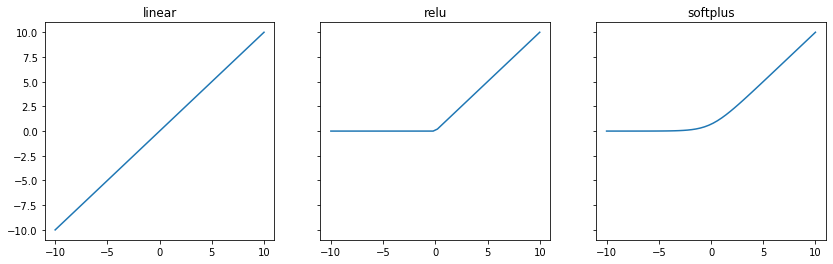

In [83]:
import matplotlib.pyplot as plt
from tensorflow.keras.activations import linear, relu, softplus

x = np.linspace(-10, 10)
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(14, 4))

for i, f in enumerate([linear, relu, softplus]):
    ax[i].plot(x, f(x))
    ax[i].set_title(f.__name__)

plt.show()

7. Как задать функцию ошибки / потерь нейронной сети? Как задать метод обучения нейронной сети?

In [85]:
model.compile(loss='mean_squared_error', optimizer='sgd')

8. Чем отличается `mean_squared_error` от `cosinus_proxmity`, по каким формулам они вычисляются? 

<img src="./out/mse-cp.png" height="100px" width="500px" />

> Евклидово расстояние против косиносувого

9. Чем отличается `SGD` от `rprop`, `Adadelta`, `Adam`; `nesterov` от `momentum`?

Stochastic gradient descent optimizer.

Includes support for momentum, learning rate decay, and Nesterov momentum.

`Rprop`, `Adadelta`, `Adam` - это методы оптимизации `SGD` c адаптивным шагом обучения. Они адаптирует скорость обучения к параметрам, выполняя небольшие обновления.

In [105]:
keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

10. Как указать обучающую выборку?

In [ ]:
train_data = np.random.random((2, 2))

model.fit(train_data, epochs=10)

### Список Источников

1. Оф. сайт `Python`. — Электронный ресурс. — Режим доступа: https://www.python.org/ — Дата доступа: 20.11.2019.
2. Документация пакетного менеджера `pyenv` — Электронный ресурс. — Режим доступа: https://github.com/pyenv/pyenv/ — Дата доступа: 20.11.2019.
3. Оф. сайт `PIP`. — Электронный ресурс. — Режим доступа: https://pypi.org/project/pip/ — Дата доступа: 20.11.2019.
4. Документация виртуальной среды `pyenv-virtualenv`. — Электронный ресурс. — Режим доступа: https://github.com/pyenv/pyenv-virtualenv — Дата доступа: 20.11.2019.
5. Пример глубокого обучения с помощью библиотеки `Keras`. — Электронный ресурс. — Режим доступа: https://keras.io/ — Дата доступа: 20.11.2019.
6. Документация библиотеки для построения графиков `Matplotlib`. — Электронный ресурс. — Режим доступа: https://matplotlib.org/ — Дата доступа: 20.11.2019.